In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

from sklearn.preprocessing import quantile_transform

In [13]:
plt.style.use('seaborn')

In [14]:
%matplotlib notebook

Traceback (most recent call last):
  File "/home/th/PlaceCells/env/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/th/PlaceCells/env/lib/python3.8/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


Place fields:
* circular
* roughly same size
* holes/obstacles are langer than the diameter of place fields
* convex

Try:
0. holes
1. holes
2. holes
3. holes

Requirement: <br>
Trajectory must pass through each pairwise intersection of place fields

In [24]:
N_SAMPLES = 10000
N_FIELDS = 90
N_NEURONS = 600

In [25]:
L = 1
pf_rad = 0.1*L
step = 0.1*L

In [26]:
def collision(p, r):
    px = p[0] + r[0]
    py = p[1] + r[1]
    if px > 1 or px < 0:
        r[0] = -r[0]
    if py > 1 or py < 0:
        r[1] = -r[1]

        
    if (px > 0.4 and px < 0.6) and (py > 0.4 and py < 0.6):
        return np.array([0, 0])
    return r

In [30]:
from math import hypot
def add_field(p, fields):
    for i, f in enumerate(fields):
        if hypot(f[0]-p[0], f[1]-p[1]) < pf_rad:
            return None
    return p

<IPython.core.display.Javascript object>


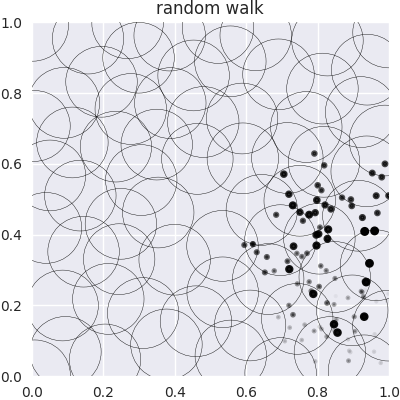

In [32]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation 
import numpy as np
from sklearn.preprocessing import quantile_transform


N_DOTS = 100

samples = list((np.array([0.1, 0.1]),))
fields = []


fig, ax =  plt.subplots(figsize=(4, 4), ncols=1)
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('random walk')

colors = np.concatenate((np.zeros((N_DOTS, 3)), np.linspace(0, 1, N_DOTS).reshape(1,-1).T), axis=1)
scat = ax.scatter([], [], lw=2)
scat.set_color(colors)
sizes = np.exp(np.linspace(0, 3, N_DOTS))
scat.set_sizes(sizes)

def animate(i):
    r = np.random.uniform(-0.1*L, 0.1*L, size=2)
    #samples = np.append(samples, r)
    r = collision(samples[-1], r)
    samples.append(samples[-1] + r)
    f = add_field(samples[-1], fields)
    if f is not None:
        fields.append(f)
        circle = plt.Circle(f, pf_rad, fill=False, edgecolor='black')
        ax.add_artist(circle)

    
    scat.set_offsets(samples[-N_DOTS:])
    fig.gca().relim()
    fig.gca().autoscale_view()


# call the animator
anim = animation.FuncAnimation(fig, animate,frames=1000,
                               interval=10, repeat=True, blit=True) 
plt.tight_layout(pad=0)
plt.show()

In [20]:
len(samples)

2

In [21]:
samples

[array([0.1, 0.1]), array([0.02300981, 0.18286687])]

In [ ]:
samples = []

while (len(samples) < N_SAMPLES):
    r = np.random.uniform(0, L, size=2)
    if not(r[0] > 0.25 and r[0] < 0.75 and r[1] > 0.25 and r[1] < 0.75):
        samples.append(r)

In [ ]:
samples = np.array(samples).reshape(-1, 2)

In [ ]:
plt.scatter(samples[:, 0], samples[:, 1])

In [ ]:
fields = []
while (len(fields) < N_FIELDS):
    r = np.random.uniform(0, L, size=2)
    if not(r[0] > 0.25 and r[0] < 0.75 and r[1] > 0.25 and r[1] < 0.75):
        fields.append(r)

In [ ]:
fields = np.array(fields).reshape(-1, 2)

In [ ]:
plt.scatter(fields[:, 0], fields[:, 1]);

In [ ]:
l_fig = 8
fig, ax = plt.subplots(figsize=(l_fig, l_fig), ncols=1)

for f in fields:
    circle = plt.Circle(f, pf_rad, fill=False, edgecolor='black')
    ax.add_artist(circle)


In [ ]:
cells = np.random.uniform(0, 0.2, size=(N_SAMPLES, N_NEURONS))

In [ ]:
cells

Each place field is assigned 1 neuron which fires in this specific place field

In [ ]:
# for each sample in samples
# see what fields it is in
# cells[i_fields] = np.random.poisson(1)


In [ ]:
from math import hypot

for n_sample, s in enumerate(samples):
    idx = []
    for i, f in enumerate(fields):
        if hypot(f[0]-s[0], f[1]-s[1]) < pf_rad:
            idx.append(i)
    #print(idx)
    cells[n_sample, idx] = np.random.poisson(1)

In [ ]:
cells

In [ ]:
full = pd.DataFrame(cells)

In [ ]:
full.columns = full.columns.astype(str) + 'N'
full['x'] = samples[:, 0]
full['y'] = samples[:, 1]

In [ ]:
full

In [ ]:
def get_angle(coordinates, cx = 0, cy = 0):
    return np.angle((coordinates['x'] - cx) + 1j * (coordinates['y'] - cy))

In [ ]:
cx = 0.5
cy = 0.5

In [ ]:
full['ang'] = get_angle(full, cx, cy)

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5), ncols=1)
plt.scatter(full['x'], full['y'],
        c=full['ang'],
        cmap='hsv',
        linewidth=0,
        s=2.5)
plt.plot(cx, cy, 'cx') 
plt.colorbar();

In [ ]:
mi = full.drop(['x', 'y'], axis=1)

In [ ]:
N_NEURONS = 20

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
mi_scores = mutual_info_regression(mi.drop(['ang'], axis=1), mi['ang'])

In [ ]:
mi_scores_df = pd.DataFrame([mi_scores], columns=mi.drop(['ang'],axis=1).columns).T.rename(columns={0: 'mi_score'})

In [ ]:
mi_scores_df = mi_scores_df.sort_values(by=['mi_score'], ascending=False)

In [ ]:
mi_scores_df = mi_scores_df.iloc[:N_NEURONS]

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10), ncols=1)

ax = sns.barplot(x=mi_scores_df['mi_score'], y=mi_scores_df.index, ax=ax);
ax.set_title("MI-scores of 24 best neurons");
fig.tight_layout();

In [ ]:
mi_scores_df.to_csv("data/gen_mi_best_neurons.csv")

In [ ]:
full.to_csv("data/gen_clean.csv")

In [ ]:
from sklearn.preprocessing import quantile_transform

fig, ax =  plt.subplots(figsize=(l_fig, l_fig), ncols=1)

col='80N'

s = full.loc[:, ['x', 'y', col]].sort_values(col)
s[col] = quantile_transform(s[col].values.reshape(-1, 1), copy=True)
ax.scatter(s['x'], s['y'],
            c=s[col],
            cmap='viridis',
            linewidth=0,
            s=np.exp(5*s[col]),
            alpha=0.1,
            edgecolors='none');